In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Media =pd.read_csv('social_media_data.csv')

In [3]:
Media.head()

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0


In [4]:
Media.isnull().sum()

date          0
platform      0
post_type     0
likes         8
shares        8
comments      8
views        10
dtype: int64

In [5]:
SM = Media.dropna()

In [6]:
SM.head()

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0


In [28]:
SM.date.unique()

array(['2023-05-24T00:00:00.000000000', '2023-02-23T00:00:00.000000000',
       '2023-03-18T00:00:00.000000000', '2023-06-12T00:00:00.000000000',
       '2023-02-03T00:00:00.000000000', '2022-12-28T00:00:00.000000000',
       '2022-12-22T00:00:00.000000000', '2022-11-18T00:00:00.000000000',
       '2023-03-26T00:00:00.000000000', '2023-09-17T00:00:00.000000000',
       '2023-10-04T00:00:00.000000000', '2023-02-07T00:00:00.000000000',
       '2023-04-09T00:00:00.000000000', '2023-03-13T00:00:00.000000000',
       '2023-05-26T00:00:00.000000000', '2023-06-11T00:00:00.000000000',
       '2023-08-30T00:00:00.000000000', '2023-02-14T00:00:00.000000000',
       '2023-01-18T00:00:00.000000000', '2022-11-12T00:00:00.000000000',
       '2022-10-28T00:00:00.000000000', '2023-08-17T00:00:00.000000000',
       '2023-06-02T00:00:00.000000000', '2023-01-11T00:00:00.000000000',
       '2023-08-15T00:00:00.000000000', '2023-09-29T00:00:00.000000000',
       '2023-01-13T00:00:00.000000000', '2023-03-31

In [7]:
SM.isnull().sum()

date         0
platform     0
post_type    0
likes        0
shares       0
comments     0
views        0
dtype: int64

In [8]:
SM.dtypes

date          object
platform      object
post_type     object
likes        float64
shares       float64
comments     float64
views        float64
dtype: object

In [9]:
SM['date'] = pd.to_datetime(SM['date'])

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1984\1971106091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SM['date'] = pd.to_datetime(SM['date'])


In [10]:
SM.dtypes

date         datetime64[ns]
platform             object
post_type            object
likes               float64
shares              float64
comments            float64
views               float64
dtype: object

In [11]:
SM.duplicated().sum()

0

In [22]:
total_likes = SM['likes'].sum()
total_likes

2538158.0

In [23]:
total_shares = SM['shares'].sum()
total_shares

979174.0

In [24]:
total_comments = SM['comments'].sum()
total_comments

600360.0

In [25]:
total_views = SM['views'].sum()
total_views

13696703.0

#### Total number of likes = 2538158.0; 
#### Total number of shares = 979174.0; 
#### Total number of comments = 600360.0;
#### Total number of views = 13696703.0

In [26]:
SM['year'] = SM['date'].dt.year
yearly_totals = SM.groupby('year').sum()

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1984\3918064144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SM['year'] = SM['date'].dt.year
C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1984\3918064144.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_totals = SM.groupby('year').sum()


<Figure size 1000x600 with 0 Axes>

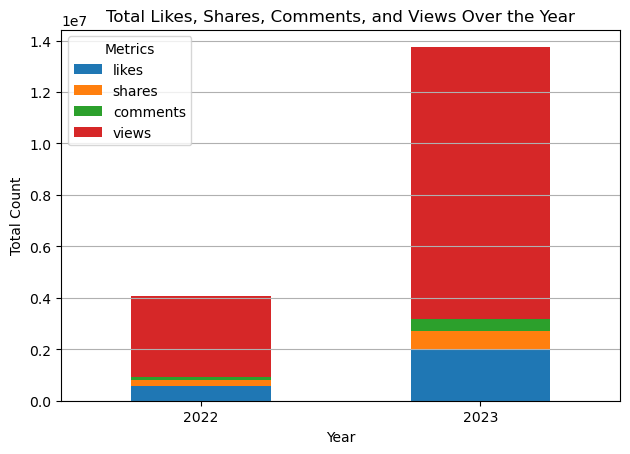

In [27]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
yearly_totals[['likes', 'shares', 'comments', 'views']].plot(kind='bar', stacked=True)
plt.title('Total Likes, Shares, Comments, and Views Over the Year')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
SM['engagement'] = SM['likes'] + SM['shares'] + SM['comments']
platform_engagement = SM.groupby('platform')['engagement'].sum()
platform_engagement 

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1984\1357958839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SM['engagement'] = SM['likes'] + SM['shares'] + SM['comments']


platform
Facebook               1308096.0
Instagram              1398932.0
NonExistingPlatform      11709.0
Twitter                1398955.0
Name: engagement, dtype: float64

In [32]:
# Find the platform with the highest engagement
platform_highest_engagement = platform_engagement.idxmax()
highest_engagement = platform_engagement.max()
highest_engagement

1398955.0

### Twitter has highest engagement of 1398955.0

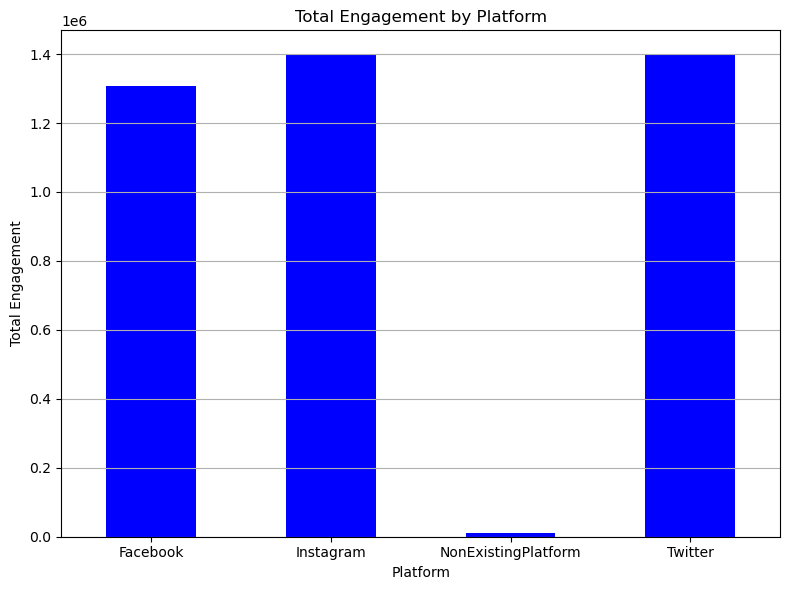

In [34]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
platform_engagement.plot(kind='bar', color='blue')
plt.title('Total Engagement by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Engagement')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [35]:
# Calculate the total number of posts for each platform
platform_post_counts = SM['platform'].value_counts()

# Calculate the total number of likes, shares, comments, and views for each platform
platform_totals = SM.groupby('platform').sum()

# Calculate the average number of likes, shares, comments, and views per post on each platform
average_likes_per_post = platform_totals['likes'] / platform_post_counts
average_shares_per_post = platform_totals['shares'] / platform_post_counts
average_comments_per_post = platform_totals['comments'] / platform_post_counts
average_views_per_post = platform_totals['views'] / platform_post_counts

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1984\3148329949.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  platform_totals = SM.groupby('platform').sum()


In [38]:
average_likes_per_post
average_shares_per_post
average_comments_per_post
average_views_per_post

Facebook               6974.108239
Instagram              6905.180723
NonExistingPlatform    6729.166667
Twitter                7012.264012
dtype: float64

In [36]:
# Combine the results into a DataFrame
average_metrics_per_post = pd.DataFrame({
    'Average Likes per Post': average_likes_per_post,
    'Average Shares per Post': average_shares_per_post,
    'Average Comments per Post': average_comments_per_post,
    'Average Views per Post': average_views_per_post
})

In [37]:
print(average_metrics_per_post)

                     Average Likes per Post  Average Shares per Post  \
Facebook                        1288.655897               513.915994   
Instagram                       1309.932229               497.066265   
NonExistingPlatform             1150.166667               515.833333   
Twitter                         1274.017699               483.647493   

                     Average Comments per Post  Average Views per Post  
Facebook                            310.668821             6974.108239  
Instagram                           299.826807             6905.180723  
NonExistingPlatform                 285.500000             6729.166667  
Twitter                             305.690265             7012.264012  


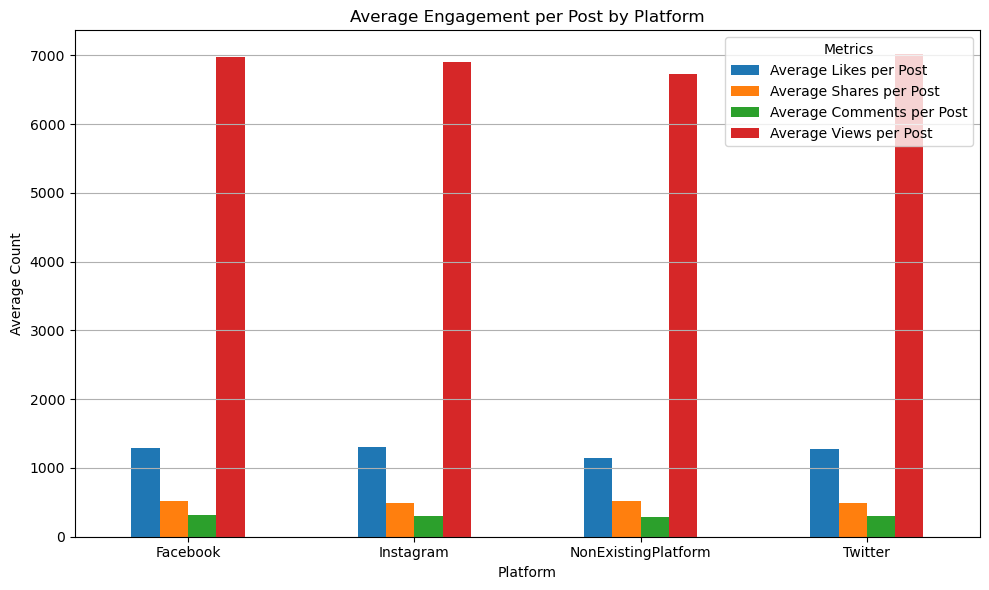

In [39]:
# Plot the grouped bar chart
average_metrics_per_post.plot(kind='bar', figsize=(10, 6))
plt.title('Average Engagement per Post by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [41]:
post_type_counts = SM.groupby(['platform', 'post_type']).size()
post_type_counts

platform             post_type
Facebook             image        216
                     text         201
                     video        202
Instagram            image        263
                     text         198
                     video        203
NonExistingPlatform  image          1
                     text           3
                     video          2
Twitter              image        248
                     text         214
                     video        216
dtype: int64

## What was the total number of each type of post (video, image, text) on each platform?
### Facebook             
                     image        216
                     text         201
                     video        202
### Instagram          
                     image        263
                     text         198
                     video        203
### NonExistingPlatform  
                     image          1
                     text           3
                     video          2
### Twitter              
                     image        248
                     text         214
                     video        216

In [42]:
# Calculate the average engagement for each post type
average_engagement_by_post_type = SM.groupby('post_type')['engagement'].mean()

In [43]:
# Find the post type with the highest average engagement
highest_engagement_post_type = average_engagement_by_post_type.idxmax()
highest_average_engagement = average_engagement_by_post_type.max()

In [44]:
print("Post type with the highest average engagement:", highest_engagement_post_type)
print("Highest average engagement:", highest_average_engagement)

Post type with the highest average engagement: text
Highest average engagement: 2129.711038961039


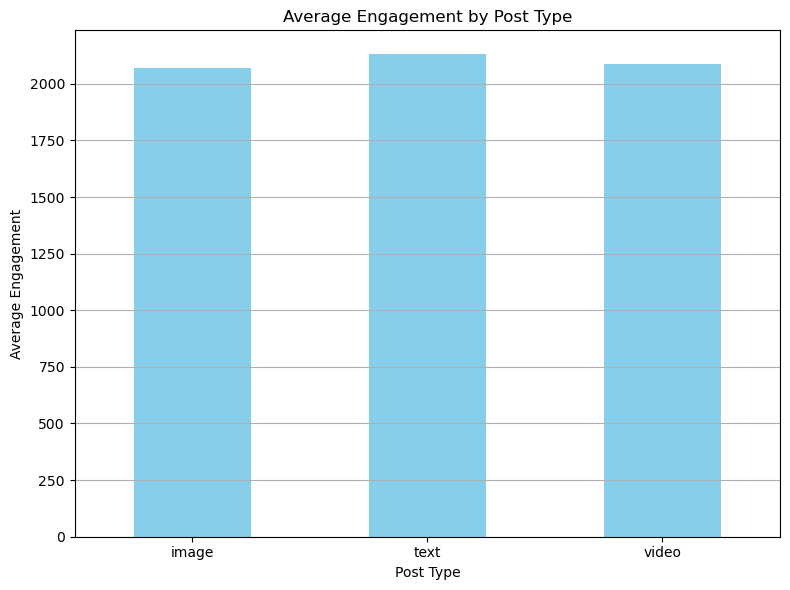

In [45]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
average_engagement_by_post_type.plot(kind='bar', color='skyblue')
plt.title('Average Engagement by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [46]:
# Group by quarter and calculate total engagement
quarterly_engagement = SM.groupby(SM['date'].dt.quarter)['likes', 'shares', 'comments'].sum()

quarterly_engagement

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1984\2787123395.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quarterly_engagement = SM.groupby(SM['date'].dt.quarter)['likes', 'shares', 'comments'].sum()


,likes,shares,comments
date,,,
1,623306.0,244470.0,154764.0
2,624352.0,227480.0,142500.0
3,602749.0,230716.0,139252.0
4,687751.0,276508.0,163844.0


<Figure size 1000x600 with 0 Axes>

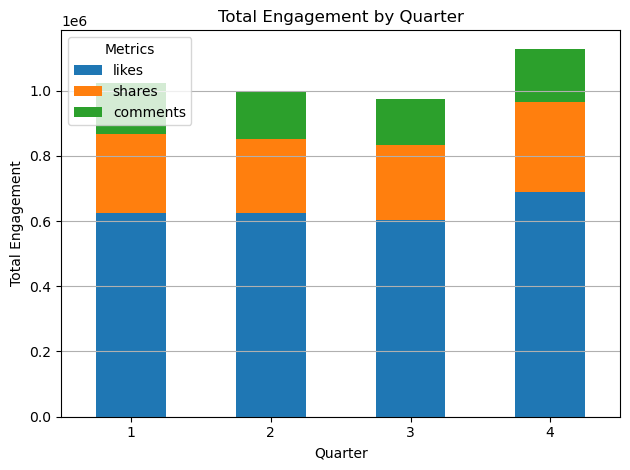

In [47]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
quarterly_engagement.plot(kind='bar', stacked=True)
plt.title('Total Engagement by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Engagement')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()